In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# read data
# show data details
# draw data


data = 
    Size  Bedrooms   Price
0  2104         3  399900
1  1600         3  329900
2  2400         3  369000
3  1416         2  232000
4  3000         4  539900
5  1985         4  299900
6  1534         3  314900
7  1427         3  198999
8  1380         3  212000
9  1494         3  242500
data description= 
               Size   Bedrooms          Price
count    47.000000  47.000000      47.000000
mean   2000.680851   3.170213  340412.659574
std     794.702354   0.760982  125039.899586
min     852.000000   1.000000  169900.000000
25%    1432.000000   3.000000  249900.000000
50%    1888.000000   3.000000  299900.000000
75%    2269.000000   4.000000  384450.000000
max    4478.000000   5.000000  699900.000000


<Axes: xlabel='Size', ylabel='Price'>

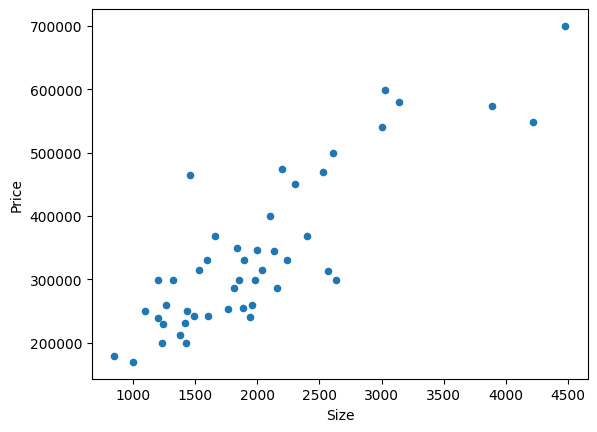

In [2]:
data = pd.read_csv("D:\\most_wonted\\ai_projects\\linear_regression\\data_set\\data_2.txt", names=['Size', 'Bedrooms', 'Price'], header=None)
print('data = \n' ,data.head(10))
print('data description= \n' ,data.describe())
data.plot(kind='scatter', x = 'Size', y = 'Price')

# Data Normalization (data rescaling)

new form of data = 
        Size  Bedrooms     Price
0  0.130010 -0.223675  0.475747
1 -0.504190 -0.223675 -0.084074
2  0.502476 -0.223675  0.228626
3 -0.735723 -1.537767 -0.867025
4  1.257476  1.090417  1.595389
5 -0.019732  1.090417 -0.323998
6 -0.587240 -0.223675 -0.204036
7 -0.721881 -0.223675 -1.130948
8 -0.781023 -0.223675 -1.026973
9 -0.637573 -0.223675 -0.783051


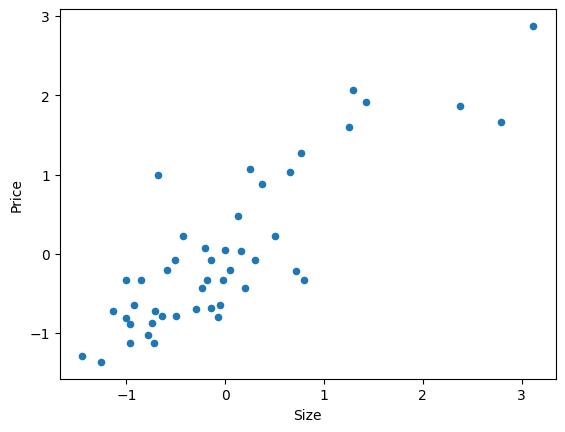

In [3]:
data = (data - data.mean()) / data.std()
data.plot(kind='scatter', x = 'Size', y = 'Price')
print('new form of data = \n' ,data.head(10))

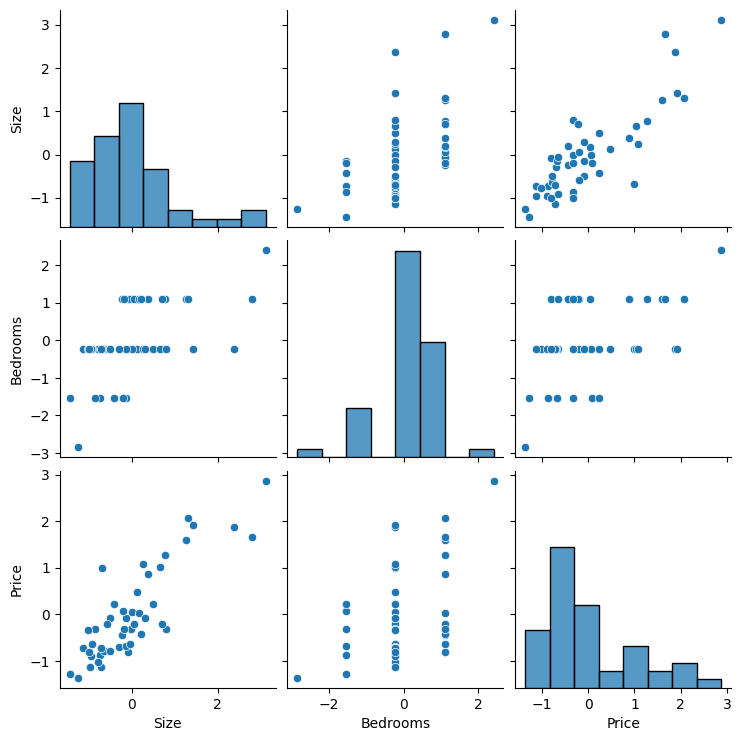

In [8]:
sb.pairplot(data)

# adding a new column called ones before the data

In [ ]:
data.insert(0, 'Ones', 1)
print('data description= \n' ,data.describe())
print('data = \n' ,data.head(10))

data description= 
        Ones          Size      Bedrooms         Price
count  47.0  4.700000e+01  4.700000e+01  4.700000e+01
mean    1.0  3.779483e-17  2.746030e-16 -9.684924e-17
std     0.0  1.000000e+00  1.000000e+00  1.000000e+00
min     1.0 -1.445423e+00 -2.851859e+00 -1.363666e+00
25%     1.0 -7.155897e-01 -2.236752e-01 -7.238702e-01
50%     1.0 -1.417900e-01 -2.236752e-01 -3.239979e-01
75%     1.0  3.376348e-01  1.090417e+00  3.521863e-01
max     1.0  3.117292e+00  2.404508e+00  2.874981e+00
data = 
    Ones      Size  Bedrooms     Price
0     1  0.130010 -0.223675  0.475747
1     1 -0.504190 -0.223675 -0.084074
2     1  0.502476 -0.223675  0.228626
3     1 -0.735723 -1.537767 -0.867025
4     1  1.257476  1.090417  1.595389
5     1 -0.019732  1.090417 -0.323998
6     1 -0.587240 -0.223675 -0.204036
7     1 -0.721881 -0.223675 -1.130948
8     1 -0.781023 -0.223675 -1.026973
9     1 -0.637573 -0.223675 -0.783051


# separate X (training data) from Y (target variable)

In [ ]:
cols = data.shape[1]
X = data.iloc[:, 0 : cols-1]
Y = data.iloc[:, cols-1 : cols]
print('X = \n',X.head(10))
print('Y = \n',Y.head(10))

X = 
    Ones      Size  Bedrooms
0     1  0.130010 -0.223675
1     1 -0.504190 -0.223675
2     1  0.502476 -0.223675
3     1 -0.735723 -1.537767
4     1  1.257476  1.090417
5     1 -0.019732  1.090417
6     1 -0.587240 -0.223675
7     1 -0.721881 -0.223675
8     1 -0.781023 -0.223675
9     1 -0.637573 -0.223675
Y = 
       Price
0  0.475747
1 -0.084074
2  0.228626
3 -0.867025
4  1.595389
5 -0.323998
6 -0.204036
7 -1.130948
8 -1.026973
9 -0.783051


# convert from data frame to matrix

In [ ]:
print(type(X))
print(type(Y))

X = np.matrix(X)
Y = np.matrix(Y)

print(type(X))
print(type(Y))

theta = np.matrix(np.zeros(cols-1, dtype=int))
print(theta)
print(theta.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.matrix'>
<class 'numpy.matrix'>
[[0 0 0]]
(1, 3)


# cost function

In [ ]:
def computeCost(X, Y, theta):
    hx = X * theta.T
    error = hx - Y
    return np.sum(np.power(error,2)) / (2 * len(data))
print(computeCost(X,Y, theta))


0.4893617021276595


# GDfunction

In [ ]:
def gradientDescent(X, Y , theta, iters, alpha):
    temp = np.matrix(np.zeros(theta.shape))
    thetasCount = theta.shape[1]
    cost = np.zeros(iters)

    for i in range(iters):
        hx = X * theta.T
        error = hx - Y
        for j in range(thetasCount):
            term = np.multiply(error, X[:,j])
            temp[0, j] = theta[0, j] - (alpha / len(X)) * np.sum(term)
        theta = temp
        cost[i] = computeCost(X, Y, theta)
    return theta, cost

# initialize variables for learning rate and iterations

In [ ]:
alpha = 0.01
iters = 1000

# perform gradient descent to "fit" the model parameters

In [ ]:
theta, cost = gradientDescent(X, Y, theta, iters, alpha)

print('parameters = ' , theta)
print('cost for iteration = ' , cost)
print('computeCost = ' , computeCost(X, Y, theta))

parameters =  [[-1.10910099e-16  8.78503652e-01 -4.69166570e-02]]
cost for iteration =  [0.4805491  0.47198588 0.46366462 0.45557814 0.44771948 0.44008189
 0.43265881 0.42544389 0.41843096 0.41161404 0.40498735 0.39854524
 0.39228228 0.38619317 0.38027278 0.37451612 0.36891839 0.36347488
 0.35818107 0.35303254 0.34802503 0.34315438 0.33841659 0.33380775
 0.32932407 0.3249619  0.32071767 0.31658793 0.31256934 0.30865863
 0.30485268 0.30114841 0.29754287 0.29403318 0.29061655 0.28729027
 0.28405173 0.28089837 0.27782772 0.27483739 0.27192505 0.26908845
 0.26632541 0.26363379 0.26101154 0.25845666 0.25596722 0.25354134
 0.25117719 0.248873   0.24662705 0.24443769 0.24230329 0.24022228
 0.23819315 0.23621442 0.23428466 0.23240248 0.23056652 0.22877549
 0.22702811 0.22532316 0.22365943 0.22203576 0.22045104 0.21890417
 0.21739409 0.21591977 0.21448021 0.21307445 0.21170155 0.2103606
 0.2090507  0.207771   0.20652067 0.2052989  0.2041049  0.20293791
 0.2017972  0.20068203 0.19959172 0.198525

# getting the best fit line

 # getting the best fit line for Size vs. Price

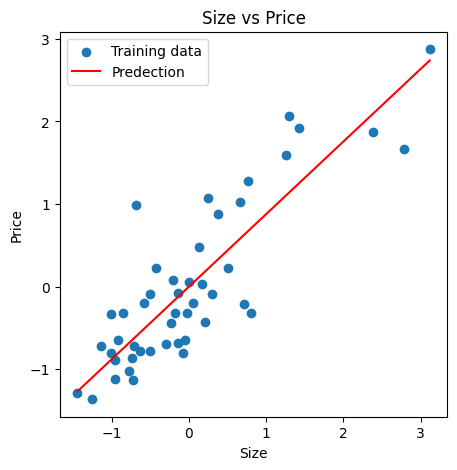

In [ ]:
x = np.linspace(data.Size.min(), data.Size.max(), 100)

f = theta[0,0] + theta[0,1] * x
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(data.Size, data.Price, label = 'Training data')
ax.plot(x, f, 'r', label = 'Predection')
ax.set_title('Size vs Price')
ax.set_xlabel('Size')
ax.set_ylabel('Price')
ax .legend()

 # getting the best fit line for Bedrooms vs. Price

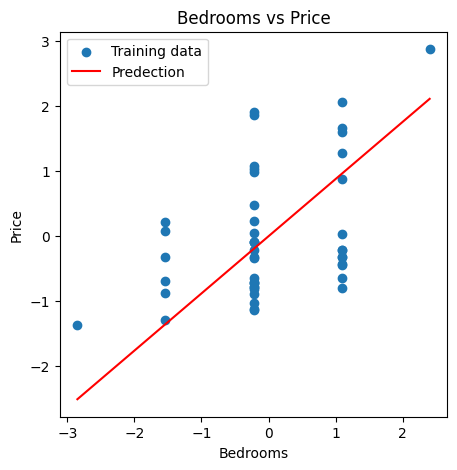

In [ ]:
x = np.linspace(data.Bedrooms.min(), data.Bedrooms.max(), 100)

f = theta[0,0] + theta[0,1] * x
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(data.Bedrooms, data.Price, label = 'Training data')
ax.plot(x, f, 'r', label = 'Predection')
ax.set_title('Bedrooms vs Price')
ax.set_xlabel('Bedrooms')
ax.set_ylabel('Price')
ax .legend()

 # getting the best fit line for Size and Bedrooms vs Price

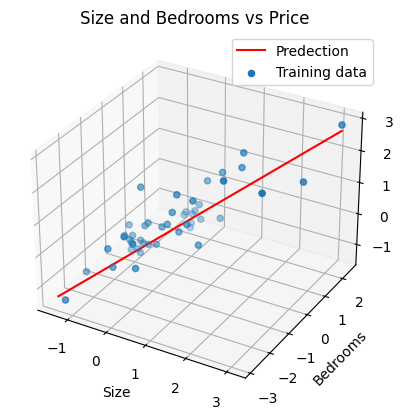

In [ ]:
x = np.linspace(data.Size.min(), data.Size.max(), 100)
y = np.linspace(data.Bedrooms.min(), data.Bedrooms.max(), 100)

f = theta[0,0] + theta[0,1] * x + theta[0,2]

ax = plt.axes(projection ='3d')
ax.plot3D(x, y, f, 'r', label = 'Predection')
ax.scatter3D(data.Size, data.Bedrooms, data.Price ,label = 'Training data')

ax.set_title('Size and Bedrooms vs Price')
ax.set_xlabel('Size')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
ax .legend()
plt.show()

# drawwing error graph

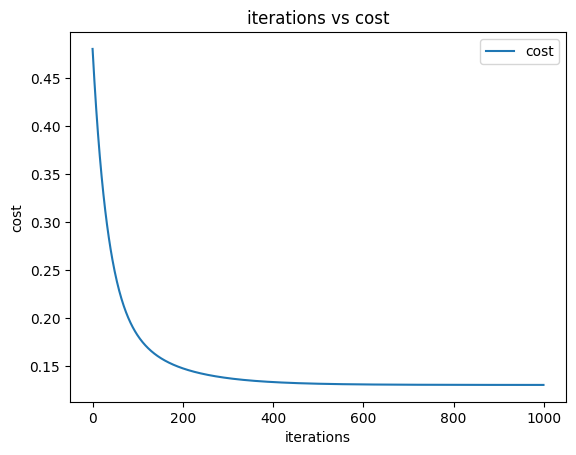

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(iters), cost, label = 'cost')
ax.set_title('iterations vs cost')
ax.set_xlabel('iterations')
ax.set_ylabel('cost')
ax .legend()